## Our goal of database is to define a style of each team in Premier League (English Top Football League) and then try to predict result of a match (Win-Draw-Lose) based on opponent and its playing style.

In [1]:
# Import and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#teams_stats_goals_url = "https://raw.githubusercontent.com/zoeblues/soccer/refs/heads/main/TeamsPremierLeagueGoals.csv?token=GHSAT0AAAAAADCXMOUTNJ6GGU75V5BML4342AOM5GQ"
#teams_stats_goals = pd.read_csv('C:/Users/mewam/hello/Data_mining/TeamsPremierLeagueGoals.csv')

#teams_url = "https://raw.githubusercontent.com/zoeblues/soccer/refs/heads/main/TeamsPremierLeague.csv?token=GHSAT0AAAAAADCXMOUSSJKYCYZKX76GDFNM2AOM7BQ"
#teams_stats = pd.read_csv("C:/Users/mewam/hello/Data_mining/TeamsPremierLeague.csv")

#match_url = "https://raw.githubusercontent.com/zoeblues/soccer/refs/heads/main/Matches.csv?token=GHSAT0AAAAAADCXMOUTS3S4QHIRMDGQT7K22AOM7UQ"
#matches = pd.read_csv("C:/Users/mewam/hello/Data_mining/Matches.csv")

teams_stats_goals = pd.read_csv("TeamsPremierLeagueGoals.csv")
teams_stats = pd.read_csv("TeamsPremierLeague.csv")
matches = pd.read_csv("Matches.csv")

In [2]:
# Check for missing values
print(matches.isnull().sum())
print(teams_stats_goals.isnull().sum())
print(teams_stats.isnull().sum())

# We see that there are no missing values

Wk            0
Day           0
Date          0
Day Date      0
Month Date    0
Year Date     0
Time          0
Home          0
xG Home       0
Home_Score    0
Away_Score    0
xG Away       0
Away          0
Attendance    0
Venue         0
Referee       0
Season        0
dtype: int64
Squad              0
# Pl               0
Age                0
Poss               0
MP                 0
Starts             0
Min                0
90s                0
Gls                0
Ast                0
G+A                0
G-PK               0
PK                 0
PKatt              0
CrdY               0
CrdR               0
xG                 0
npxG               0
xAG                0
npxG+xAG           0
PrgC               0
PrgP               0
Gls per 90         0
Ast per 90         0
G+A per 90         0
G-PK per 90        0
G+A-PK per 90      0
xG per 90          0
xAG per 90         0
xG+xAG per 90      0
npxG per 90        0
npxG+xAG per 90    0
Season             0
dtype: int64
Squad    

In [3]:
#teams_stats_goals = teams_stats_goals.drop(['Age','MP','Starts','Min','90s'],axis=1)

#teams_stats = teams_stats.drop(['90s','Touches','Live','Succ','Tkld','PrgC','Mis','Dis','PrgR'],axis=1)

#matches = matches.drop(['Day','Date','Day Date','Year Date','Venue','Referee'],axis=1)

# Check remaining columns
print(matches.columns)
print(teams_stats.columns)
print(teams_stats_goals.columns)


Index(['Wk', 'Day', 'Date', 'Day Date', 'Month Date', 'Year Date', 'Time',
       'Home', 'xG Home', 'Home_Score', 'Away_Score', 'xG Away', 'Away',
       'Attendance', 'Venue', 'Referee', 'Season'],
      dtype='object')
Index(['Squad', '# Pl', 'Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld',
       'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis',
       'Dis', 'Rec', 'PrgR', 'Season'],
      dtype='object')
Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls per 90', 'Ast per 90',
       'G+A per 90', 'G-PK per 90', 'G+A-PK per 90', 'xG per 90', 'xAG per 90',
       'xG+xAG per 90', 'npxG per 90', 'npxG+xAG per 90', 'Season'],
      dtype='object')


We decided to delete some of the columns we decided that are unnecessary.

**DATA SET – matches:**

- **Day, Date, Day Date, Year Date** – were deleted because of redundancy; we believe Matchweek Number and Month columns will be enough for our model.
- **Venue** – was deleted because the stadium is always the same (home team stadium); we will distinguish this advantage using different columns.
- **Referee** – we believe that referees should be unbiased and should not influence the result.

**DATA SET – teams_stats:**

- **90s** – total match number is constant and the same for all clubs.
- **Touches, Live** – we think these columns are too general and we will distinguish touches by specific parts of the field.
- **Succ, Tkld** – we think these columns are redundant as we already track the number of attack attempts and success %.
- **PrgC, PrgR** – these columns are already in another dataset.
- **Mis, Dis** – we think these columns are irrelevant as they are more connected to personal mistakes rather than team mistakes.

**DATA SET – teams_stats_goals:**

- **Age** – we think this column does not bring anything to our model nor to the playstyle of a team.
- **MP, Starts, Min, 90s** – these numbers are constant and the same for all clubs.


Now we will test whether any outliers exist in our data source.
We will assume that an outlier is defined as a value with a Z-score greater than 3.


In [4]:
from scipy import stats
import numpy as np

def findOutliers(dataset):
    z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=[np.number]), nan_policy='omit'))
    outlier_threshold = 3
    outlier_mask = (z_scores > outlier_threshold)

    outliers_per_column = (outlier_mask).sum(axis=0)
    print("\nOutliers per numerical column (Z-score > 3):")
    print(outliers_per_column)

print("Matches:")
findOutliers(matches)
print("Teams_stats:")
findOutliers(teams_stats)
print("Teams_stats_goals:")
findOutliers(teams_stats_goals)

Matches:

Outliers per numerical column (Z-score > 3):
[ 0  0  0  0  5 10  4  6  0  0]
Teams_stats:

Outliers per numerical column (Z-score > 3):
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Teams_stats_goals:

Outliers per numerical column (Z-score > 3):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\mewam\AppData\Local\Temp\ipykernel_28464\421131375.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=[np.number]), nan_policy='omit'))
C:\Users\mewam\AppData\Local\Temp\ipykernel_28464\421131375.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(dataset.select_dtypes(include=[np.number]), nan_policy='omit'))


After the analysis, we observed a few potential outliers in the `matches` and `teams_stats` datasets.
We can verify whether they are data errors or simply rare events, such as a player scoring 7 goals in a single match — which, while uncommon, can occur.


In [5]:
def findOutliersDetails(dataset, dataset_name="Dataset", id_columns=[]):
    numerical_data = dataset.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))
    outlier_threshold = 3
    outlier_mask = (z_scores > outlier_threshold)

    outliers_per_column = outlier_mask.sum(axis=0)
    rows_with_outliers = outlier_mask.any(axis=1)

    # Only keep the numerical outlier values
    outlier_only_values = numerical_data.where(outlier_mask)

    # Keep only rows with at least one outlier
    outlier_rows = outlier_only_values[rows_with_outliers]

    # Add team name columns (or match ID) for identification
    if id_columns:
        id_info = dataset.loc[rows_with_outliers, id_columns]
        outlier_rows = pd.concat([id_info.reset_index(drop=True), outlier_rows.reset_index(drop=True)], axis=1)

    print(f"\nTotal rows with outliers in {dataset_name}: {outlier_rows.shape[0]}")
    if not outlier_rows.empty:
        print(f"Example outlier columns in {dataset_name} (including IDs):")
        print(outlier_rows.dropna(how='all', axis=1).head())  # Drop completely NaN columns in view

    return outlier_rows

# Example usage (you need to specify what identifies your match/team)
print("Matches - detailed outliers:")
outlier_rows_matches = findOutliersDetails(matches, "Matches", id_columns=["Home", "Away"])

print("Teams_stats - detailed outliers:")
outlier_rows_teams_stats = findOutliersDetails(teams_stats, "Teams_stats", id_columns=["Squad"])

Matches - detailed outliers:

Total rows with outliers in Matches: 24
Example outlier columns in Matches (including IDs):
              Home             Away  xG Home  Home_Score  Away_Score  xG Away
0           Fulham        Brentford      NaN         NaN         NaN      3.7
1    Sheffield Utd    Newcastle Utd      NaN         NaN         8.0      3.9
2      Aston Villa         Brighton      NaN         6.0         NaN      NaN
3   Manchester Utd  Manchester City      NaN         NaN         NaN      4.0
4  Manchester City      Bournemouth      NaN         6.0         NaN      NaN
Teams_stats - detailed outliers:

Total rows with outliers in Teams_stats: 1
Example outlier columns in Teams_stats (including IDs):
             Squad  Att 3rd    1/3
0  Manchester City  10260.0  867.0


C:\Users\mewam\AppData\Local\Temp\ipykernel_28464\980247120.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))


In [6]:
def findOutliersDetails(dataset, dataset_name="Dataset", id_columns=[]):
    numerical_data = dataset.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))
    outlier_threshold = 3
    outlier_mask = (z_scores > outlier_threshold)

    outliers_per_column = outlier_mask.sum(axis=0)
    rows_with_outliers = outlier_mask.any(axis=1)

    # Only keep the numerical outlier values
    outlier_only_values = numerical_data.where(outlier_mask)

    # Keep only rows with at least one outlier
    outlier_rows = outlier_only_values[rows_with_outliers]

    # Add team name columns (or match ID) for identification
    if id_columns:
        id_info = dataset.loc[rows_with_outliers, id_columns]
        outlier_rows = pd.concat([id_info.reset_index(drop=True), outlier_rows.reset_index(drop=True)], axis=1)

    print(f"\nTotal rows with outliers in {dataset_name}: {outlier_rows.shape[0]}")
    if not outlier_rows.empty:
        print(f"Example outlier columns in {dataset_name} (including IDs):")
        print(outlier_rows.dropna(how='all', axis=1).head())  # Drop completely NaN columns in view

    return outlier_rows

# Example usage (you need to specify what identifies your match/team)
print("Matches - detailed outliers:")
outlier_rows_matches = findOutliersDetails(matches, "Matches", id_columns=["Home", "Away"])

print("Teams_stats - detailed outliers:")
outlier_rows_teams_stats = findOutliersDetails(teams_stats, "Teams_stats", id_columns=["Squad"])

Matches - detailed outliers:

Total rows with outliers in Matches: 24
Example outlier columns in Matches (including IDs):
              Home             Away  xG Home  Home_Score  Away_Score  xG Away
0           Fulham        Brentford      NaN         NaN         NaN      3.7
1    Sheffield Utd    Newcastle Utd      NaN         NaN         8.0      3.9
2      Aston Villa         Brighton      NaN         6.0         NaN      NaN
3   Manchester Utd  Manchester City      NaN         NaN         NaN      4.0
4  Manchester City      Bournemouth      NaN         6.0         NaN      NaN
Teams_stats - detailed outliers:

Total rows with outliers in Teams_stats: 1
Example outlier columns in Teams_stats (including IDs):
             Squad  Att 3rd    1/3
0  Manchester City  10260.0  867.0


C:\Users\mewam\AppData\Local\Temp\ipykernel_28464\980247120.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))


## Outlier Analysis

### Matches
We can observe that the outliers in the `matches` dataset are actual results, mainly caused by high numbers of goals or high expected goals (xG).
Since these results are legitimate and reflect real-world match outcomes, **we will keep them in our data source**.

### Team Stats
The outlier detected in the `teams_stats` dataset corresponds to **Manchester City** and their number of attacks in the final third of the field.
Given Manchester City's well-known dominance in the Premier League and their superior offensive play, this data is also accurate.
Thus, **we will keep this outlier as well**.


In [7]:
print("Matches")
print(matches.head())

print("teams Stats Goals")    
print(teams_stats_goals.head())

print("General Teams Stats")
print(teams_stats.head())

print(teams_stats_goals.columns)

Matches
   Wk  Day            Date  Day Date  Month Date  Year Date   Time  \
0   1  Fri  11 August 2023        11           8       2023  20:00   
1   1  Sat  12 August 2023        12           8       2023  12:30   
2   1  Sat  12 August 2023        12           8       2023  15:00   
3   1  Sat  12 August 2023        12           8       2023  15:00   
4   1  Sat  12 August 2023        12           8       2023  15:00   

            Home  xG Home  Home_Score  Away_Score  xG Away             Away  \
0        Burnley      0.3           0           3      1.9  Manchester City   
1        Arsenal      0.8           2           1      1.2  Nott'ham Forest   
2        Everton      2.7           0           1      1.5           Fulham   
3  Sheffield Utd      0.5           0           1      1.9   Crystal Palace   
4       Brighton      4.0           4           1      1.5       Luton Town   

   Attendance                                   Venue         Referee  Season  
0     21572.0   

In [8]:
# It is time for basic calculations to compare two seasons

season_comparison = teams_stats_goals.groupby("Season")[[
    "Poss", "Gls", "Ast", "CrdY", "CrdR", "PK"
]].mean().reset_index()

print("Season comparison:")
print(season_comparison)

season_comparison_1 = teams_stats.groupby("Season")[["Def Pen", "Def 3rd", "Mid 3rd", "Att 3rd", "Att Pen"]].mean().reset_index()
print(season_comparison_1)




Season comparison:
   Season    Poss    Gls    Ast   CrdY  CrdR   PK
0    2023  49.995  51.95  36.30  69.65   1.5  3.7
1    2024  50.005  59.85  42.95  82.75   2.9  4.8
   Season  Def Pen  Def 3rd   Mid 3rd  Att 3rd  Att Pen
0    2023   2521.6  7656.85   9936.35  5662.80   885.55
1    2024   2644.6  7791.75  10151.75  6029.35   996.10


In [ ]:
def get_points(home_goals, away_goals):
    if home_goals > away_goals:
        return (3, 0)
    elif home_goals == away_goals:
        return (1, 1)
    else:
        return (0, 3)

matches[['Home_Points', 'Away_Points']] = matches.apply(
    lambda row: pd.Series(get_points(row['Home_Score'], row['Away_Score'])),
    axis=1
)

home_results = matches[['Home', 'Home_Points', 'Season']].rename(columns={
    'Home': 'Team',
    'Home_Points': 'Points'
})
away_results = matches[['Away', 'Away_Points', 'Season']].rename(columns={
    'Away': 'Team',
    'Away_Points': 'Points'
})

full_results = pd.concat([home_results, away_results])

season_table = full_results.groupby(['Season', 'Team']).agg({'Points': 'sum'}).reset_index()


pivot_table = season_table.pivot(index="Team", columns="Season", values="Points").fillna(0).astype(int)
pivot_table = pivot_table.sort_values(by=pivot_table.columns.max(), ascending=False)
pivot_table

pivot_table["Rank_2023"] = pivot_table[2023].rank(ascending=False, method='min').astype(int)
pivot_table["Rank_2024"] = pivot_table[2024].rank(ascending=False, method='min').astype(int)


pivot_table["Rank_Change"] = pivot_table["Rank_2023"] - pivot_table["Rank_2024"]

sorted_table = pivot_table.sort_values(by=2023, ascending=False)[[2023, 2024, "Rank_2023", "Rank_2024", "Rank_Change"]]

sorted_table.rename(columns={
    2023: "Points_2023",
    2024: "Points_2024"
}, inplace=True)

sorted_table

# if there is a rank it means that the team is in a lower division 

Season,Points_2023,Points_2024,Rank_2023,Rank_2024,Rank_Change
Team,,,,,
Manchester City,89,106,1,1,0
Arsenal,84,101,2,2,0
Manchester Utd,75,66,3,8,-5
Newcastle Utd,71,67,4,7,-3
Liverpool,67,89,5,3,2
Brighton,62,52,6,11,-5
Aston Villa,61,69,7,6,1
Tottenham,60,72,8,5,3
Brentford,59,43,9,16,-7


Now we are checking correlation between xG with Goals  

In [10]:

home_corr = matches['xG Home'].corr(matches['Home_Score'])
away_corr = matches['xG Away'].corr(matches['Away_Score'])

print(f"Correlation between xG Home and Home Score: {home_corr:.3f}")
print(f"Correlation between xG Away and Away Score: {away_corr:.3f}")
# as we can see based on results xG and Goals are slightly correlated

non_penalty_goals = teams_stats_goals['G-PK per 90'].corr(teams_stats_goals['npxG per 90'])
print(f"Correlation between xG non penalty and Goals without penalty: {non_penalty_goals:.3f}")
# we can conlcude that penalties strongly affects xG




Correlation between xG Home and Home Score: 0.582
Correlation between xG Away and Away Score: 0.602
Correlation between xG non penalty and Goals without penalty: 0.898


Before we checked for overall correlation of expected goals and actual goals

Now we want to see if there exists a correlation for each team individually - maybe some teams perform as expected, whereas others are unpredictable

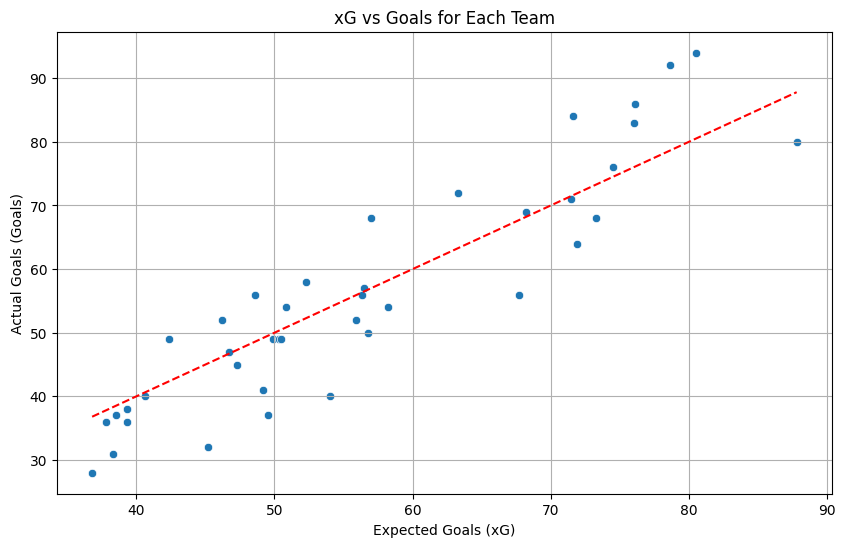

In [11]:


plt.figure(figsize=(10,6))
sns.scatterplot(data=teams_stats_goals, x='xG', y='Gls')
plt.plot([teams_stats_goals['xG'].min(), teams_stats_goals['xG'].max()],
         [teams_stats_goals['xG'].min(), teams_stats_goals['xG'].max()],
         color='red', linestyle='--')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals (Goals)')
plt.title('xG vs Goals for Each Team')
plt.grid(True)
plt.show()

# each dot is one team, the red line is the reference line where actual goals are equal to expected goals
# we see that some teams deviate from the average but there are no important outliers

Now let's see if posession % has impact to total points - a team might have

Now we want to check attendance's  influence on match

In [12]:
average_attendance = matches.groupby('Home')['Attendance'].mean()

# Define result for home team
def home_result(row):
    if row['Home_Score'] > row['Away_Score']:
        return 'Win'
    elif row['Home_Score'] == row['Away_Score']:
        return 'Draw'
    else:
        return 'Lose'

matches['Home_Result'] = matches.apply(home_result, axis=1)

# Compare attendance to the venue's average
matches['Attendance_vs_Avg'] = matches.apply(
    lambda row: 'More than avg' if row['Attendance'] > average_attendance[row['Home']] else 'Less than avg',
    axis=1
)

# Create a pivot table with counts
result_table = matches.pivot_table(
    index='Home_Result',
    columns='Attendance_vs_Avg',
    aggfunc='size',
    fill_value=0
)

print(result_table)

# nic z tego nie wynika


Attendance_vs_Avg  Less than avg  More than avg
Home_Result                                    
Draw                          84             89
Lose                          97            151
Win                          188            188


          Def Pen   Def 3rd   Mid 3rd   Att 3rd   Att Pen
Def Pen  1.000000  0.735377 -0.277103 -0.507797 -0.497829
Def 3rd  0.735377  1.000000  0.310243 -0.048587 -0.070165
Mid 3rd -0.277103  0.310243  1.000000  0.862479  0.783047
Att 3rd -0.507797 -0.048587  0.862479  1.000000  0.944003
Att Pen -0.497829 -0.070165  0.783047  0.944003  1.000000


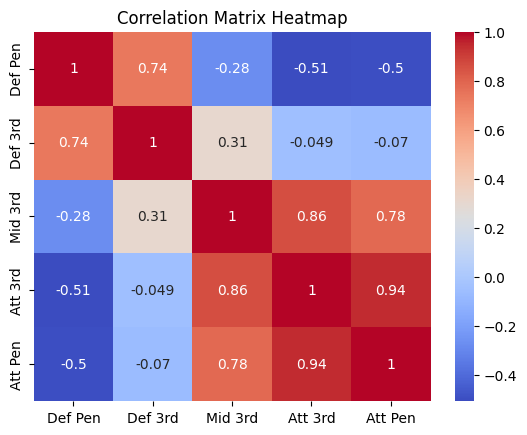

Poss       1.000000
Def Pen   -0.274123
Def 3rd    0.305455
Mid 3rd    0.945549
Att 3rd    0.897237
Att Pen    0.845809
Name: Poss, dtype: float64


In [13]:
numeric_df = teams_stats[['Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd','Att Pen']]
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


correlations_ball_possesion = teams_stats[['Poss', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd','Att Pen']].corr().loc['Poss']
print(correlations_ball_possesion)


Teams with more possession tend to have more touches in the middle third. 

Teams with more possession have fewer touches in their defensive penalty area (because they are less often defending).

There is no strong relationship between possession and touches in defensive third.

Correlation between Def Pen and Def 3rd: Teams that have more touches in the defensive penalty area also tend to have more touches in the defensive third.

Correlation between Def Pen and Att 3rd: Teams that have more touches in their defensive penalty area slightly have fewer touches in the attacking third.

Correlation between Mid 3rd and Att 3rd: Teams that dominate the middle third also dominate the attacking third — strong positive link.

In [14]:
combined_df = pd.merge(teams_stats_goals[['Squad', 'Gls']], 
                       teams_stats[['Squad', 'Att 3rd', 'Att Pen']],
                       on='Squad')

# Now calculate correlations
correlation_goals_touches = combined_df[['Gls', 'Att 3rd', 'Att Pen']].corr().loc['Gls']

print(correlation_goals_touches)

Gls        1.000000
Att 3rd    0.761338
Att Pen    0.781467
Name: Gls, dtype: float64


Those numbers prove that touches on opponent's half have impact on scored goals

c:\Users\mewam\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mewam\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


              Squad                Style
0           Arsenal    High Press Attack
1       Aston Villa    Defensive Compact
2       Bournemouth  Possession Build-up
3         Brentford      Slow Possession
4          Brighton       Counter Attack
5           Burnley     Direct Long Ball
6           Chelsea       Counter Attack
7    Crystal Palace  Possession Build-up
8           Everton  Possession Build-up
9            Fulham     Direct Long Ball
10        Liverpool    High Press Attack
11       Luton Town  Possession Build-up
12  Manchester City    High Press Attack
13   Manchester Utd    Defensive Compact
14    Newcastle Utd    Defensive Compact
15  Nott'ham Forest  Possession Build-up
16    Sheffield Utd  Possession Build-up
17        Tottenham       Counter Attack
18         West Ham  Possession Build-up
19           Wolves     Direct Long Ball

Cluster Summary Stats:



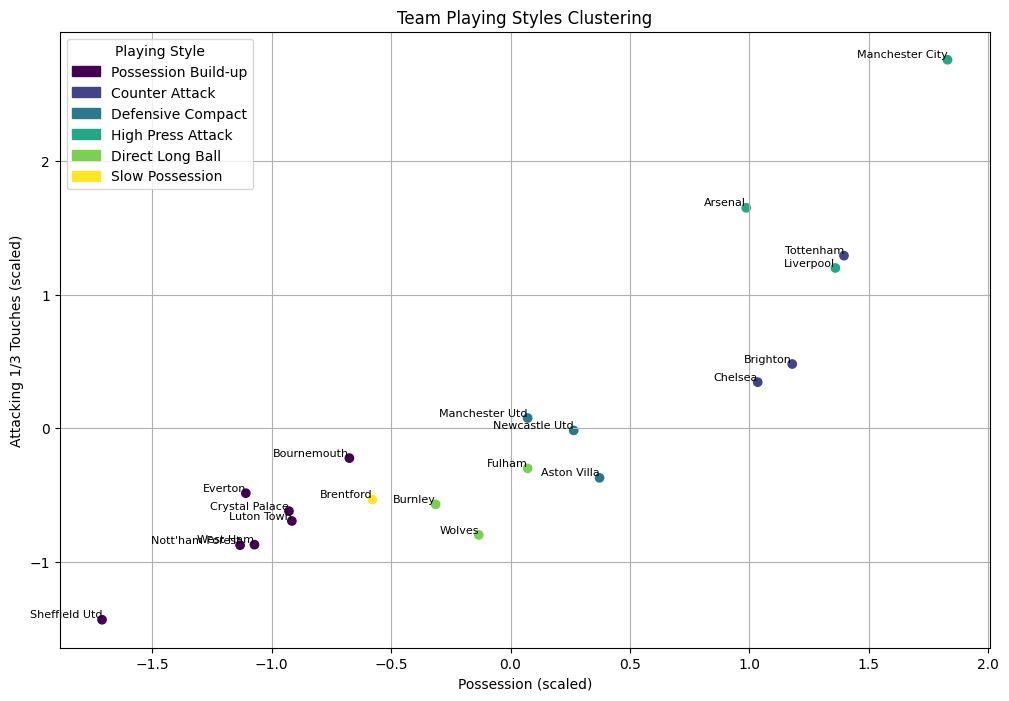

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Filter for Season 2024
teams_stats = teams_stats[teams_stats['Season'] == 2024]
teams_stats_goals = teams_stats_goals[teams_stats_goals['Season'] == 2024]

# Merge important features together
combined = pd.merge(
    teams_stats[['Squad', 'Poss', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Carries', 'TotDist', 'PrgDist', 'Rec']],
    teams_stats_goals[['Squad', 'Gls', 'Ast', 'xG', 'npxG', 'xAG', 'PrgP']],
    on='Squad'
)

# Features we care about
features = ['Poss', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 
            'Carries', 'TotDist', 'PrgDist', 'Rec', 
            'Gls', 'Ast', 'xG', 'npxG', 'xAG', 'PrgP']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined[features])

# Apply KMeans clustering (let's assume 6 clusters based on richer playing styles)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
combined['Cluster'] = clusters

# Initial mapping of styles (to be adjusted after analyzing stats)
style_map = {
    0: 'Possession Build-up',
    1: 'Counter Attack',
    2: 'Defensive Compact',
    3: 'High Press Attack',
    4: 'Direct Long Ball',
    5: 'Slow Possession'
}

combined['Style'] = combined['Cluster'].map(style_map)

# Display the result
print(combined[['Squad', 'Style']])

# Summarize stats per cluster
cluster_summary = combined.groupby('Cluster')[features].mean().round(2)
print("\nCluster Summary Stats:\n")
#print(cluster_summary)


# Plot clusters for visualization 
plt.figure(figsize=(12,8))
scatter = plt.scatter(X_scaled[:,0], X_scaled[:,4], c=clusters, cmap='viridis')

# Team names on the plot
for i, team in enumerate(combined['Squad']):
    plt.text(X_scaled[i,0], X_scaled[i,4], team, fontsize=8, ha='right', va='bottom')

# Create legend manually
legend_labels = style_map
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=legend_labels[i]) for i in range(6)]
plt.legend(handles=handles, title="Playing Style")

plt.xlabel('Possession (scaled)')
plt.ylabel('Attacking 1/3 Touches (scaled)')
plt.title('Team Playing Styles Clustering')
plt.grid(True)
plt.show()


In [16]:
style_descriptions = pd.DataFrame({
    'Style': ['Possession Build-up', 'Counter Attack', 'Defensive Compact', 'High Press Attack', 'Direct Long Ball', 'Slow Possession'],
    'Description': [
        'Some teams (Man City, Brighton) dominate possession and build from the back.',
        'Some teams (Aston Villa, Wolves) focus on fast attacks after defense.',
        'Teams like Sheffield United, Luton stay very defensive, low possession.',
        'Teams like Liverpool or Arsenal press aggressively.',
        'Brentford, Everton: long balls, skipping midfield.',
        'Chelsea (bad form), Crystal Palace: slow passing without much attacking progress.'
    ]
})

print("\nStyle Descriptions:\n")
print(style_descriptions)


Style Descriptions:

                 Style                                        Description
0  Possession Build-up  Some teams (Man City, Brighton) dominate posse...
1       Counter Attack  Some teams (Aston Villa, Wolves) focus on fast...
2    Defensive Compact  Teams like Sheffield United, Luton stay very d...
3    High Press Attack  Teams like Liverpool or Arsenal press aggressi...
4     Direct Long Ball  Brentford, Everton: long balls, skipping midfi...
5      Slow Possession  Chelsea (bad form), Crystal Palace: slow passi...


In [ ]:



team_styles_correct = dict(zip(combined['Squad'], combined['Style']))
# Map styles into matches
matches['Home_Style'] = matches['Home'].map(team_styles_correct)
matches['Away_Style'] = matches['Away'].map(team_styles_correct)

# Calculate Points for Home and Away teams
def get_points(home_goals, away_goals):
    if home_goals > away_goals:
        return (3, 0)
    elif home_goals == away_goals:
        return (1, 1)
    else:
        return (0, 3)

matches[['Home_Points', 'Away_Points']] = matches.apply(
    lambda row: pd.Series(get_points(row['Home_Score'], row['Away_Score'])),
    axis=1
)

# Prepare home and away results
home_results = matches[['Home', 'Away_Style', 'Home_Points']].rename(columns={
    'Home': 'Team',
    'Away_Style': 'Opponent_Style',
    'Home_Points': 'Points'
})
away_results = matches[['Away', 'Home_Style', 'Away_Points']].rename(columns={
    'Away': 'Team',
    'Home_Style': 'Opponent_Style',
    'Away_Points': 'Points'
})

# Combine
full_results = pd.concat([home_results, away_results])

# Group by Team and Opponent Style
performance = full_results.groupby(['Team', 'Opponent_Style']).agg(
    Matches=('Points', 'count'),
    Total_Points=('Points', 'sum')
).reset_index()

performance['Avg_Points'] = (performance['Total_Points'] / performance['Matches']).round(2)

# Find best and worst vs styles
best_vs = performance.loc[performance.groupby('Team')['Avg_Points'].idxmax()].reset_index(drop=True)
worst_vs = performance.loc[performance.groupby('Team')['Avg_Points'].idxmin()].reset_index(drop=True)

summary = best_vs[['Team', 'Opponent_Style', 'Avg_Points']].rename(columns={
    'Opponent_Style': 'Best_vs_Style',
    'Avg_Points': 'Best_Avg_Points'
})
summary['Worst_vs_Style'] = worst_vs['Opponent_Style']
summary['Worst_Avg_Points'] = worst_vs['Avg_Points']

print(summary)



               Team        Best_vs_Style  Best_Avg_Points     Worst_vs_Style  \
0           Arsenal  Possession Build-up             2.58  High Press Attack   
1       Aston Villa     Direct Long Ball             2.00  Defensive Compact   
2       Bournemouth     Direct Long Ball             2.00  High Press Attack   
3         Brentford  Possession Build-up             1.64  Defensive Compact   
4          Brighton  Possession Build-up             1.72  High Press Attack   
5           Burnley      Slow Possession             1.50  High Press Attack   
6           Chelsea  Possession Build-up             2.22  High Press Attack   
7    Crystal Palace     Direct Long Ball             1.91     Counter Attack   
8           Everton      Slow Possession             2.50  Defensive Compact   
9            Fulham  Possession Build-up             1.84  High Press Attack   
10     Leeds United     Direct Long Ball             1.50  High Press Attack   
11   Leicester City     Direct Long Ball

As we can see High Press Attack is very hard style to play against.

In [18]:
full_results = pd.concat([home_results, away_results])
full_results['Team_Style'] = full_results['Team'].map(team_styles_correct)

# Step 5: Build style matchup matrix
style_vs_style = full_results.groupby(['Team_Style', 'Opponent_Style']).agg(
    Matches=('Points', 'count'),
    Avg_Points=('Points', 'mean')
).round(2).reset_index()

matchup_matrix = style_vs_style.pivot(index='Team_Style', columns='Opponent_Style', values='Avg_Points')

print(matchup_matrix)

Opponent_Style       Counter Attack  Defensive Compact  Direct Long Ball  \
Team_Style                                                                 
Counter Attack                 1.46               1.13              1.55   
Defensive Compact              1.67               1.46              2.39   
Direct Long Ball               1.26               0.45              1.25   
High Press Attack              2.13               2.03              2.61   
Possession Build-up            0.65               0.96              1.35   
Slow Possession                1.50               0.46              1.36   

Opponent_Style       High Press Attack  Possession Build-up  Slow Possession  
Team_Style                                                                    
Counter Attack                    0.59                 2.13             1.00  
Defensive Compact                 0.76                 1.81             2.31  
Direct Long Ball                  0.33                 1.40             1.3

PREDICTIVE SCOUTING TOOL 

In [19]:

team_vs_style = full_results.groupby(['Team', 'Opponent_Style']).agg(
    Matches=('Points', 'count'),
    Avg_Points=('Points', 'mean')
).round(2).reset_index()

# Step 3: Predictive Scouting Tool Function
def predict_match(team_name, opponent_name):
    opponent_style = team_styles_correct.get(opponent_name)
    if opponent_style is None:
        return f"No style found for opponent: {opponent_name}"

    # Get performance history of team vs that style
    row = team_vs_style[(team_vs_style['Team'] == team_name) & (team_vs_style['Opponent_Style'] == opponent_style)]

    if row.empty:
        return f"{team_name} has not played against teams with style: {opponent_style}"

    avg_pts = row['Avg_Points'].values[0]

    # Classify result type
    if avg_pts >= 2.4:
        prediction = "Win"
    elif avg_pts >= 1.8:
        prediction = "Win/Draw"
    elif avg_pts >= 1.3:
        prediction = "Draw"
    elif avg_pts >= 0.8:
        prediction = "Draw/Lose"
    else:
        prediction = "Lose"

    return f"{team_name} vs {opponent_name} ({opponent_style}) → Avg Points: {avg_pts} → Predicted Result: {prediction}"

# Example usage:
print(predict_match("Arsenal", "Burnley"))
print(predict_match("Brighton", "Liverpool"))
print(predict_match("Tottenham", "Brentford"))


Arsenal vs Burnley (Direct Long Ball) → Avg Points: 2.5 → Predicted Result: Win
Brighton vs Liverpool (High Press Attack) → Avg Points: 0.75 → Predicted Result: Lose
Tottenham vs Brentford (Slow Possession) → Avg Points: 1.25 → Predicted Result: Draw/Lose
